In [ ]:
import pandas as pd #20BCE1935 Raman Kumar
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sb 
import sys
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
d1 = pd.read_csv('/content/drive/MyDrive/IAPM/new.csv') 
d1 

,Date,Open Price,Close Price
0,01-Jan-21,47785.28,47868.98
1,04-Jan-21,48109.17,48176.80
2,05-Jan-21,48037.63,48437.78
3,06-Jan-21,48616.66,48174.06
4,07-Jan-21,48524.36,48093.32
...,...,...,...
243,27-Dec-21,56948.33,57420.24
244,28-Dec-21,57751.21,57897.48
245,29-Dec-21,57892.31,57806.49
246,30-Dec-21,57755.40,57794.32


In [ ]:
import datetime

def convert(date):
    month=date[3:6]
    date=month+" "+date[:2]+" "+date[7:]
    format='%b %d %y'
    datetime_str=datetime.datetime.strptime(date, format)
    return datetime_str
	
date='11-Jan-2019'
print(convert(date))


ValueError: ignored

In [ ]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

data['month'] = data.datetime.dt.month
data = encode(data, 'month', 12)

data['day'] = data.datetime.dt.month
data = encode(data, 'day', 365)

In [ ]:
d1.head() #Preview of the data

,Date,Open Price,Close Price
0,01-Jan-21,47785.28,47868.98
1,04-Jan-21,48109.17,48176.80
2,05-Jan-21,48037.63,48437.78
3,06-Jan-21,48616.66,48174.06
4,07-Jan-21,48524.36,48093.32


In [ ]:
d1.info()  #Basic Information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         248 non-null    object 
 1   Open Price   248 non-null    float64
 2   Close Price  248 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.9+ KB


In [ ]:
d1.dropna() #Dropping NULL values if any. 

,Date,Open Price,Close Price
0,01-Jan-21,47785.28,47868.98
1,04-Jan-21,48109.17,48176.80
2,05-Jan-21,48037.63,48437.78
3,06-Jan-21,48616.66,48174.06
4,07-Jan-21,48524.36,48093.32
...,...,...,...
243,27-Dec-21,56948.33,57420.24
244,28-Dec-21,57751.21,57897.48
245,29-Dec-21,57892.31,57806.49
246,30-Dec-21,57755.40,57794.32


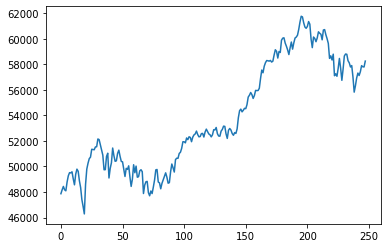

In [ ]:
d1['Close Price'].plot() #Graph showing the variation in Closing price

In [ ]:
d1_bin=d1[['Date','Close Price']]

In [ ]:
d1.head()

,Date,Open Price,Close Price
0,01-Jan-21,47785.28,47868.98
1,04-Jan-21,48109.17,48176.80
2,05-Jan-21,48037.63,48437.78
3,06-Jan-21,48616.66,48174.06
4,07-Jan-21,48524.36,48093.32


In [ ]:
x = np.array(d1_bin['Date']).reshape(-1, 1)
y = np.array(d1_bin['Close Price']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
d1_bin.dropna(inplace = True)
  
# Dropping any rows with Nan values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test)) #Printing the Score of Regression

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


ValueError: ignored